[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pIDKIinTZ2o2-f4zyb83qpOIgmJzmeLj?usp=sharing)

# **Week 3 - Animation of Linear Kinetic Models**

## **Abstract**

1. **Brief Overview of Parameter Generation**: Creating an array of random integers and adding Gausian Noise to data using **NumPy's** `Uniform` function.  

2. **Animations on Google Colab**: Introducing the `IPython.display` to create gifs using individual frames. These can be used to visualize Kinetic Models in Python.

3. **Linear and Polynomial Models**: The use of Linear and Polynomial models to predict data, inspecting the advantages and distadvantages of each model. Introducing the mathmatical structure of these models.

4. **Overfitting and Underfitting**: Overfitting  occurs when a model learns the training data too well, capturing noise and irrelevant details, which leads to poor generalization to new data. Underfitting, occurs when a model is too simple to capture the underlying patterns in the data, resulting in a lack of accuracy both on the training and test data.

5. **Understanding Lambda and Regularization**: To avoid overfitting or underfitting data, lambda are introduced as critical elements in machine learning. Introducing the magnitudes of the coefficient to optimize regularization.


>## **References: Essential Resources for Further Learning**
>
>1. **NumPy Random Tutorial**: [Tutorial](https://numpy.org/doc/stable/reference/random/index.html)
2. **Creating Animations with Matplotlib**: [Tutorial](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)
3. **Linear Regression in Python**: [Tutorial](https://realpython.com/linear-regression-in-python/)
4. **Overfitting and Underfitting in Machine Learning**: [Article](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)
5. **Regularization in Machine Learning**: [Tutorial](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)


Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.





In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image # For GIF
import os

## **Understanding Linear Kinetic Models in Python - Animation**

To visualize Linear Kinetic Models in Python, we can generate random data using **NumPy's** `Uniform` function.


In [2]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N):
    x = np.linspace(-1.,1.,N) #This creates an array x of N linearly spaced values between -1 and 1.
    y = np.sin(.5*x) + x -1.
    y = y + np.random.uniform(low = 0.,high=0.5,size=x.shape) #Adds random noise to each y value.
    return x,y

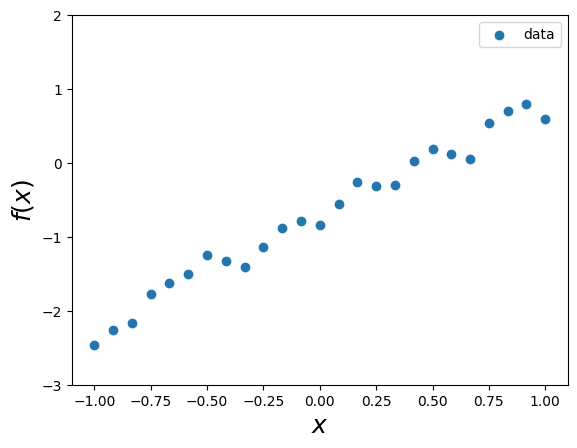

In [3]:
def model(x,params):
    m,b = params #tuple
    return m*x + b
x,y = get_data(25)
plt.scatter(x,y,label='data')
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$f(x)$',fontsize=18)
plt.ylim(-3.,2.)
plt.legend()
# plt.savefig('Figures/data.png')

> This graph shows the datapoints generated. Using Python and Linear Regression, we can fit a model (a line of best fit) to the datapoints.

### **Generating Random Parameters**

*   **Purpose:** The purpose of this function is to generate a 2D matrix of random numbers. The dimensions of this array are $m x 2$, meaning there are m rows and 2 columns.

- $$[m,b] \sim U([-2,2])$$






In [4]:
#random parameters
def get_random_params(m):
    theta_random = np.random.uniform(low=-2.,high=2.,size=(m,2))
    return theta_random

## **Figure Per Frame**


> The model will plot a series of linear models based on the parameters.

> Loops over each pair of parameters **`(m, b)`** in `theta_rnd`.
For each pair, it calls `plot_figure_frame` to plot the data and the linear model based on those parameters.

In [5]:
def plot_figure_frame(data,params,i):
    m,b = params
    x,y = data
    f = lambda x,m,b:m*x + b

    x_grid = np.linspace(-1., 1., 100)
    y_pred = f(x_grid, m, b)

    fig, ax = plt.subplots()
    ax.clear()
    ax.scatter(x, y,label='data')
    ax.plot(x_grid,y_pred,color='k',label='model')
    ax.text(0.2,-2.5,'m=%.2f, b=%.2f'%(m,b),fontsize=15)
    ax.legend(loc=1)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$f(x)$', fontsize=18)
    ax.set_ylim(-3., 2.)
    # plt.savefig('Figures/linear_model_%s.png'%(i))


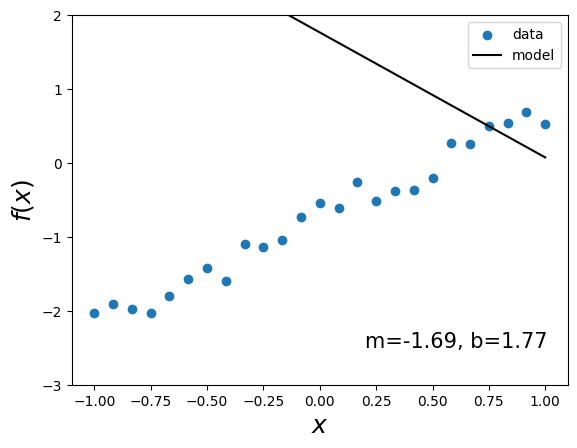

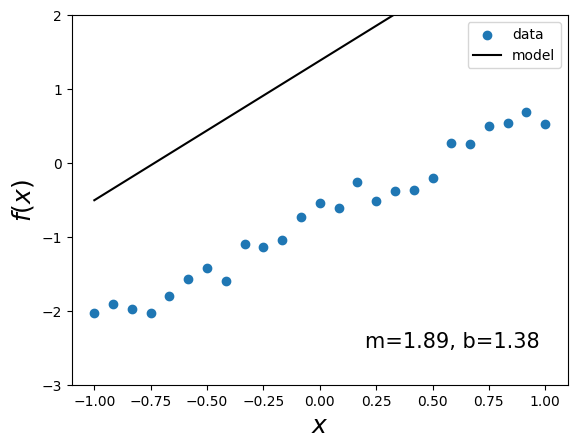

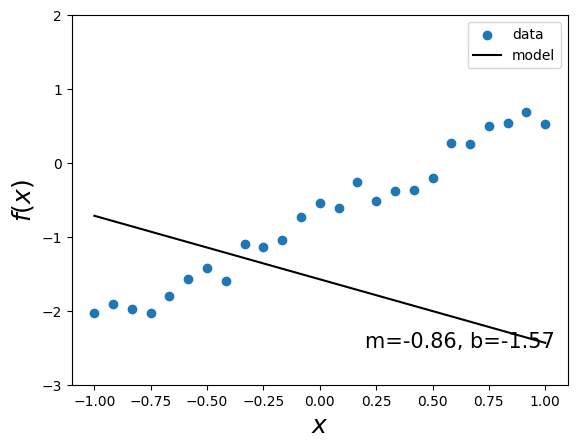

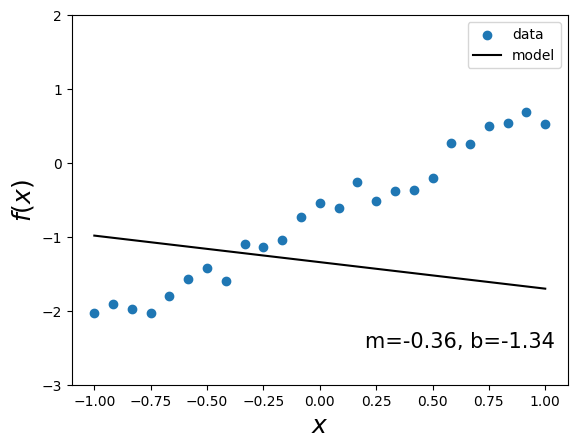

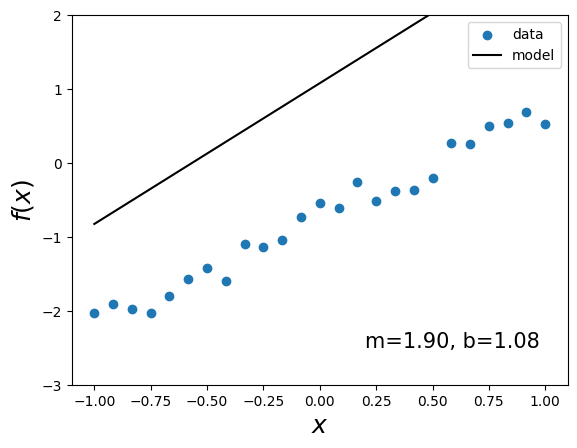

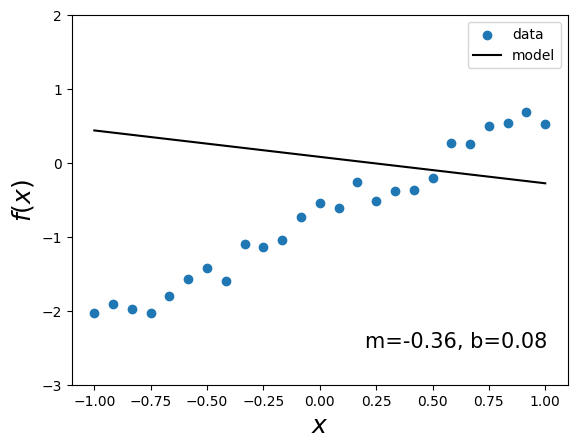

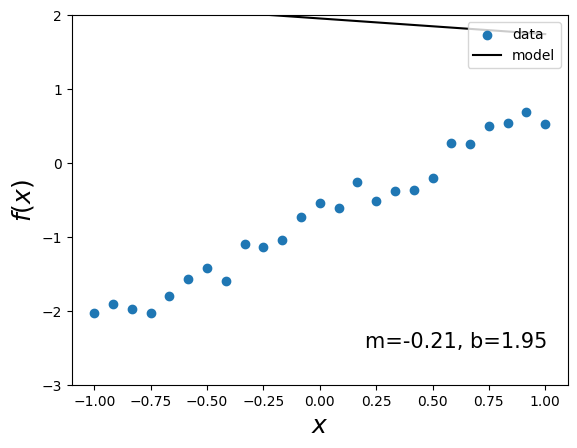

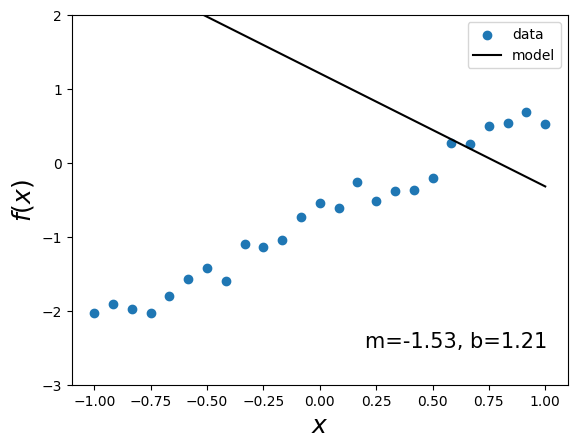

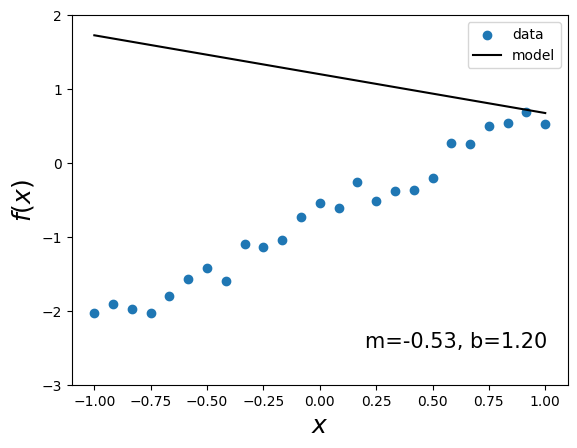

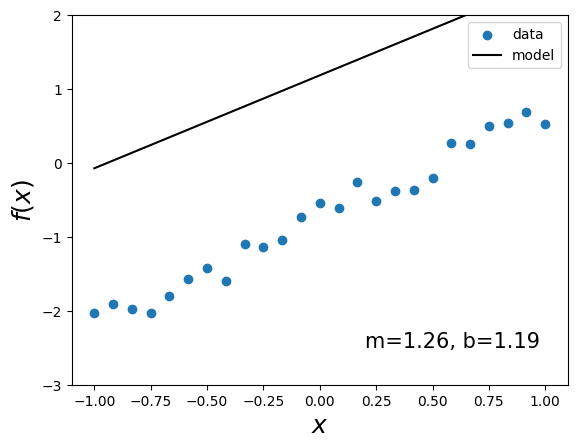

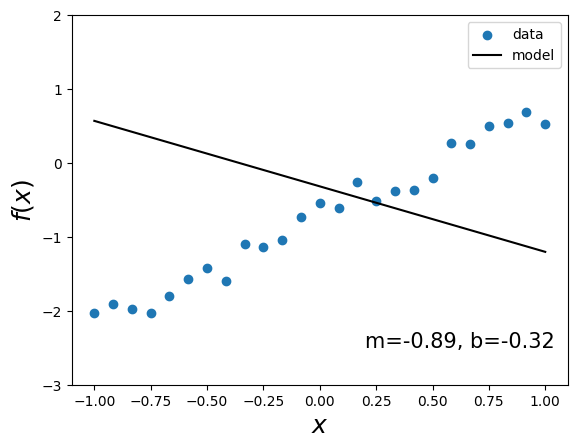

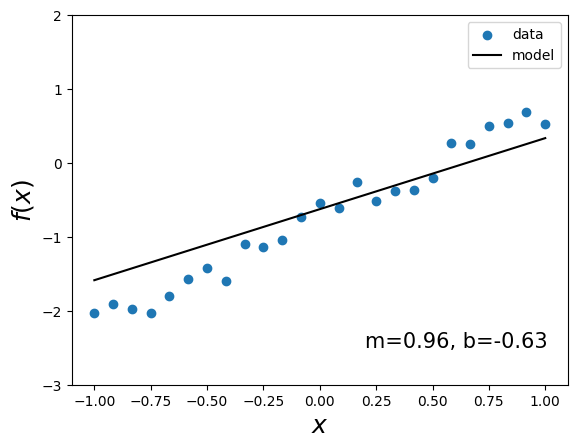

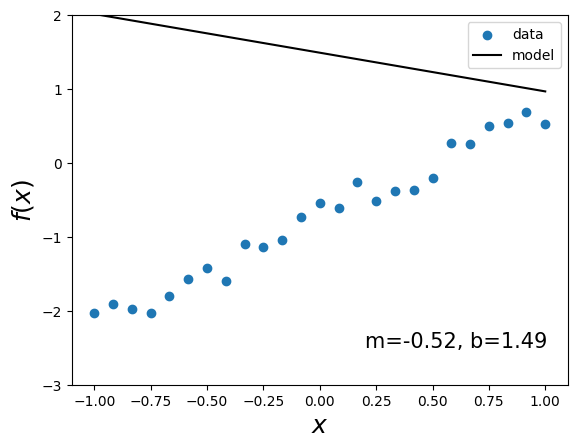

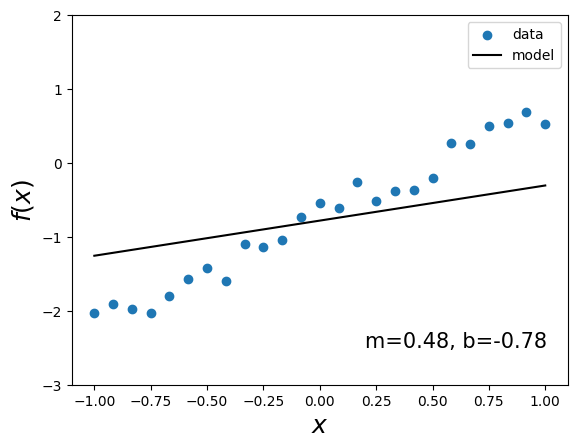

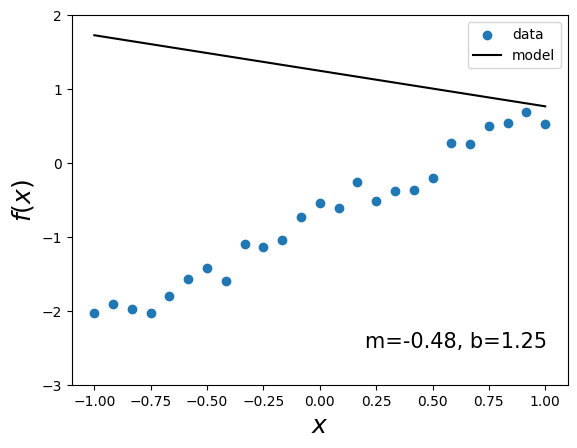

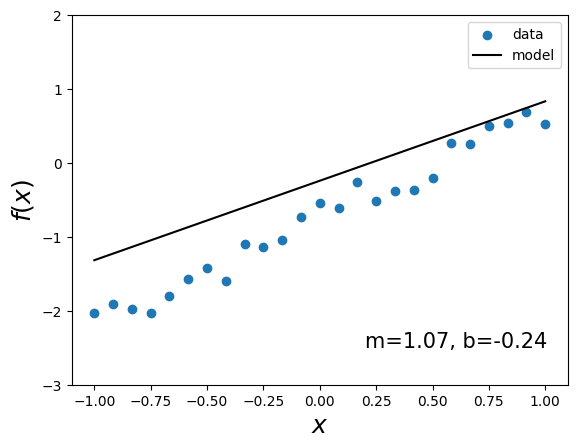

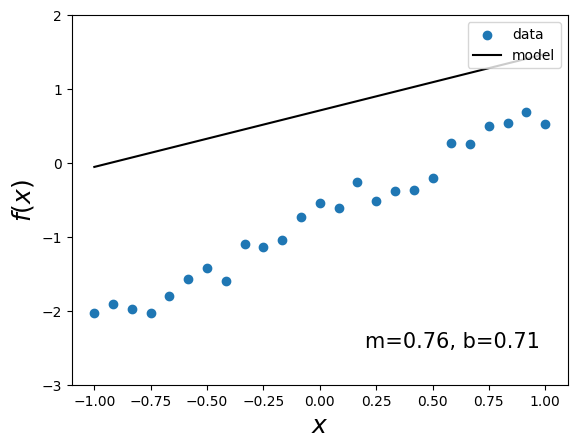

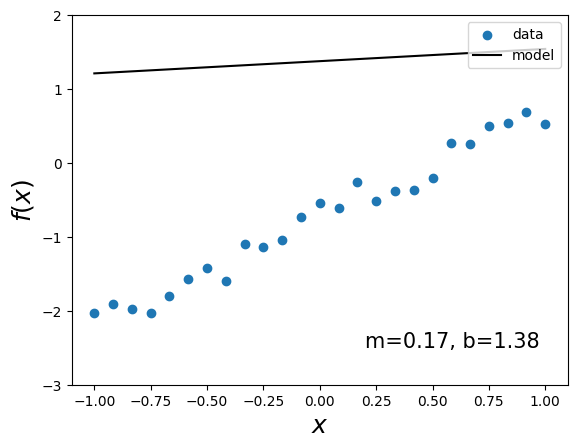

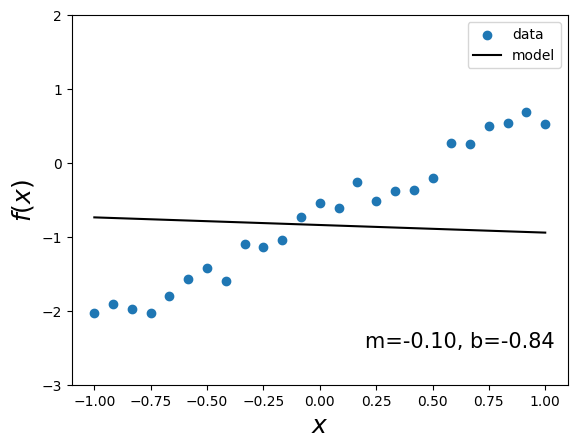

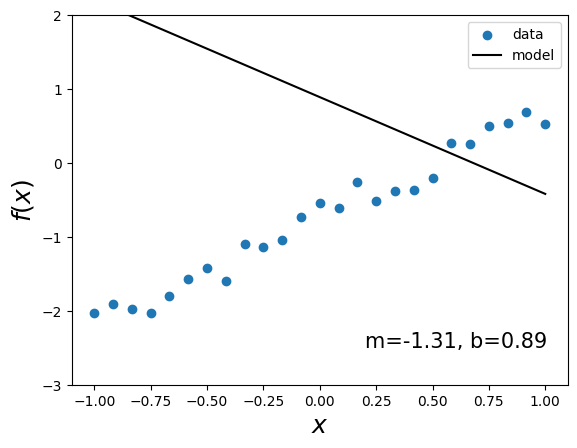

In [6]:
theta_rnd = get_random_params(20)
x, y = get_data(25)
for i, p in enumerate(theta_rnd):
    plot_figure_frame((x,y),p,i)
    plt.draw()
    plt.pause(0.01)

## **Animation**

> To animate the Linear model in Google Colab, the [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) library can convert frames to gifs.

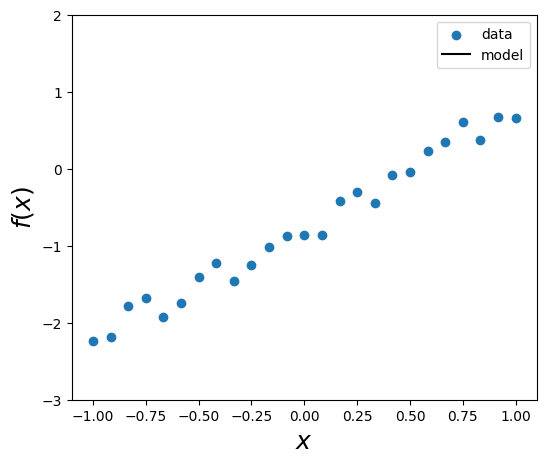

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML

x,y = get_data(25)
theta_rnd = get_random_params(20)

fig, ax = plt.subplots(figsize=(6,5))
# plt.figure(facecolor='white')

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_ylim(-3., 2.)
ax.set_xlim(-1.1, 1.1)
ax.scatter(x,y,label='data')

# line1, = ax.plot([], [], ms=20, label='data')
line2, = ax.plot([], [], ms=20, color='k', label='model')
txt2 = ax.text(0.2,-2.5, '',fontsize=15)
ax.legend(loc=1)

def drawframe(n):
    params = theta_rnd[n]
    m, b = params
    def f(x, m, b): return m*x + b

    x_grid = np.linspace(-1., 1., 100)
    y_pred = f(x_grid, m, b)

    # line1.set_data(x,y)
    line2.set_data(x_grid,y_pred)
    txt2.set_text('m=%.2f, b=%.2f'%(m,b))

    return (line2)

> The original plotted data

In [8]:
%matplotlib inline
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(
    fig, drawframe, frames=19, interval=200, blit=False)

# Save as GIF
anim.save('animation.gif')  # writer='pillow'

# play animation
HTML(anim.to_html5_video())


## **Polynomials Models - Kinetic Models**

Polynomial models are a class of regression models that use polynomial functions to fit a relationship between a dependent variable and **one or more independent variables**. Unlike linear models, which are constrained to a straight line, polynomial models can **fit data with curves and complex** relationships, making them more flexible for a wide range of datasets.


- **General Form**: The general form of a polynomial model is given by:
  - $y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon$
    where:
    - $y$ is the dependent variable.
    - $x$ is the independent variable.
    - $\beta_0, \beta_1, \ldots, \beta_n$ are the coefficients of the model.
    - $n$ is the degree of the polynomial.
    - $\epsilon$ represents the error term.


- **Degree of the Polynomial**:
  - The degree $n$ of the polynomial determines the curve's complexity.
  - A degree of 1 corresponds to a linear model (straight line).
  - Higher degrees (2 for quadratic, 3 for cubic, etc.) allow for more complex curves.


- **Flexibility**:
  - Polynomial models are more flexible than linear models, able to fit data with curves and non-linear relationships.


- **Overfitting Concern**:
  - Caution is needed to avoid overfitting, especially with high-degree polynomials.
  - Overfitting occurs when the model becomes too complex, fitting the noise in the data rather than the underlying trend.



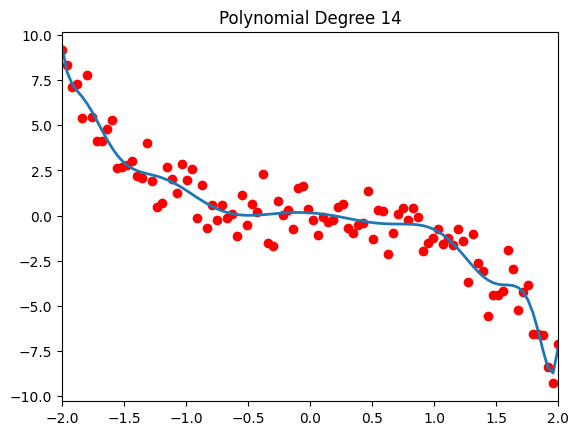

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# New function to generate data
def get_data(N):
    x = np.linspace(-2, 2, N)
    y = np.sin(x**3) * np.cos(x) - x**3
    y += np.random.normal(scale=1, size=x.shape)  # Adding Gaussian noise
    return x, y

# Generate data
x, y = get_data(100)

# Set up the figure, the axis, and the plot element
fig, ax = plt.subplots()
ax.set_xlim((min(x), max(x)))
ax.set_ylim((min(y)-1, max(y)+1))

# Plot the data points
ax.scatter(x, y, color='red')

line, = ax.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# Animation function
def animate(i):
    if i == 0:
        return (line,)
    z = np.polyfit(x, y, i)
    p = np.poly1d(z)
    line.set_data(x, p(x))
    ax.set_title(f"Polynomial Degree {i}")
    return (line,)

# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=15, interval=200, blit=True)

# Display the animation
HTML(anim.to_html5_video())

In [9]:
# polynomial
def poly_pred(data,deg):
    x,y = data
    X = np.column_stack((x,np.ones_like(x)))
    w = np.polyfit(x, y, deg)

    x_grid = np.linspace(-1.,1.,100)
    y_pred = np.polyval(w,x_grid)
    return x_grid,y_pred,w

1 [ 1.46582989 -0.68900447]
3 [-0.13160367  0.22376762  1.5681883  -0.78845675]
5 [ 0.64852221  0.40214764 -0.97228061 -0.2039132   1.76796822 -0.73739038]
7 [ 0.46612074 -8.80615037 -0.0765545  13.30004465 -0.69030634 -4.49332876
  1.74494991 -0.54913427]
9 [ 0.34767529 -5.86775217  0.15459503  0.32146412 -0.22292521  9.75041679
 -0.56876162 -4.20356322  1.73362633 -0.54913427]


<ipython-input-10-87294eb700ce>:5: RankWarning: Polyfit may be poorly conditioned
  x_grid,y_pred,w = poly_pred((x,y),p)
<ipython-input-10-87294eb700ce>:5: RankWarning: Polyfit may be poorly conditioned
  x_grid,y_pred,w = poly_pred((x,y),p)


Text(0, 0.5, '$f(x)$')

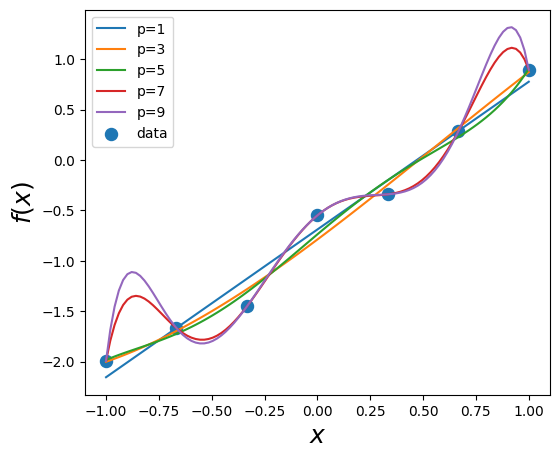

In [10]:
x, y = get_data(7)

fig, ax = plt.subplots(figsize=(6, 5))
for p in range(1,11,2): # loop over different degrees
    x_grid,y_pred,w = poly_pred((x,y),p)
    print(p,w)
    plt.plot(x_grid,y_pred,label='p=%s'%p)
plt.scatter(x,y,s=75,label='data')
plt.legend()
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$f(x)$',fontsize=18)
# plt.savefig('Figures/polyfit_2.png',dpi=1800)

### **Regularization and Overfitting - Introduction**

In the last code snipped there was a `Ranking Warning` warning. A `Rank Warning` means the polynomial being fit to the data might not work well,  because the polynomial is too complex compared to the amount of data. In application, this can be avoided by:

<br>

1. **Conditioning of the Problem**: High-degree polynomials can cause numerical instability and poor conditioning, leading to large oscillations in the fit.

2. **Data Scaling**: Scaling both `x` and `y` data to a smaller range can improve the condition of the polynomial fitting and potentially reduce numerical errors.

3. **Regularization**: Regularization techniques like reducing the polynomial degree can limit model complexity, but are less straightforward in polynomial fitting compared to linear models.


> It is important to condition and regularize the data to avoid **overfitting** or **underfitting** the polynominal.


<br>

<a href="https://github.com/RodrigoAVargasHdz/CHEM-4PB3" target="_blank">
  <img src="https://raw.githubusercontent.com/RodrigoAVargasHdz/CHEM-4PB3/Volume-2/Assests/overfitting_underfitting_graphs.png" alt="Visualizing LogP" width="700">
</a>
<br>
</a>

**Figure 3 - Illustrating Overfitting versus Underfitting. Image by Rudra Sondhi.**

<br>


>#### **Learn More:**
1. **What is Overfitting in Deep Learning**: [Educational Resource](https://www.v7labs.com/blog/overfitting)
2. **Regularization in Machine Learning (with Code Examples)**: [Example Application](https://www.dataquest.io/blog/regularization-in-machine-learning/)
3. **Polynomial Regression**: [Educational Resource](https://medium.com/analytics-vidhya/polynomial-regression-%EF%B8%8F-e0e20bfbe9d5)


## **The Challenge of Overfitting**

- **Risk in Flexibility**:  Higher-degree polynomials might fit the training data too precisely, capturing noise rather than the underlying trend, a phenomenon known as overfitting.
- **Consequences**: An overfitted model performs poorly on new, unseen data, rendering it less effective for predictive purposes.

<br>

### **Regularization: A Key Solution**

Regularization addresses the challenge of overfitting by introducing constraints into the model fitting process. It penalizes the complexity of the model, encouraging simpler models that are more likely to generalize well.

- **Formula and Implementation**: The optimal parameters for a regularized polynomial model can be computed using the formula:
  - $\boldsymbol{\theta}^{*}(\lambda) = \left ( \mathbf{\Phi}(\mathbf{X})^{\top} \mathbf{\Phi}(\mathbf{X})  + \lambda \mathbb{I}\right)^{-1} \mathbf{\Phi}(\mathbf{X})^{\top}\mathbf{y}$, where $\lambda$ is the regularization parameter.
- **Balancing Act**: The regularization parameter $\lambda$ plays a crucial role in balancing the model's complexity against its ability to generalize. It determines the extent to which the model's complexity is penalized, impacting both bias and variance.
- **The parameter $\boldsymbol{\theta} \$:** In the context of regularization are the coefficients of the model that are adjusted to minimize the penalty imposed by regularization.

> **Library:** [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from `Sklearn`.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Define the linear model solver as per the provided code
def linear_model_solver(data, deg, l):
    x, y = data
    poly = PolynomialFeatures(deg)
    X = x[:, np.newaxis]  # reshape x to (N, 1)
    Phi = poly.fit_transform(X)  # create polynomial features
    Phit_Phi = Phi.T @ Phi
    Phit_y = Phi.T @ y
    lambda_I = l * np.eye(Phit_Phi.shape[0])
    A = Phit_Phi + lambda_I
    A_inv = np.linalg.inv(A)
    w = A_inv @ Phit_y
    return w

In [12]:
def f_poly(x, w, deg):
    poly = PolynomialFeatures(deg)
    X = x[np.newaxis].T
    Phi = poly.fit_transform(X)
    Phi = Phi[:, ::-1] # reverse column order (xixj, ..., 1)
    y_pred = Phi @ w
    return y_pred


>**Polynomial Feature Transformation**:
**Inputs**:
- Dataset : `data`
- Degree of the polynomial : `deg`
- Regularization parameter `l` ( or $\boldsymbol{\lambda} \$)

>The model considers linear terms like **$x$** but also higher-degree terms  **$x^2$, $x^3$, $..., x^{\text{deg}} $**.


In [13]:
x,y = get_data(7)
l_ = np.array([0.,1E-4,1E-3,1E-2,1E-1,1.]) # lambda
w_ = []
deg = 7
for l in l_: # loop over variuos lambda
    w = linear_model_solver((x,y),deg,l)
    w_.append(w) # list of optimal parameters

,θ0,θ1,θ2,θ3,θ4,θ5,θ6,θ7
0.000000,-9.51e-01,6.55e-01,1.15e+00,1.40e+00,-1.51e+00,2.97e+00,4.03e-01,-2.34e+00
0.000100,-9.45e-01,9.13e-01,1.03e+00,1.27e+00,-1.17e+00,2.30e-02,1.74e-01,-6.86e-01
0.001000,-9.32e-01,9.39e-01,7.77e-01,1.18e+00,-4.52e-01,2.57e-02,-3.09e-01,-6.28e-01
0.010000,-9.11e-01,1.06e+00,5.89e-01,7.74e-01,-1.51e-01,4.13e-02,-4.39e-01,-3.52e-01
0.100000,-8.30e-01,1.06e+00,2.01e-01,4.21e-01,-6.53e-02,9.47e-02,-2.05e-01,-5.50e-02
1.000000,-6.62e-01,6.78e-01,-9.06e-02,3.55e-01,-6.50e-02,2.33e-01,-6.47e-02,1.81e-01


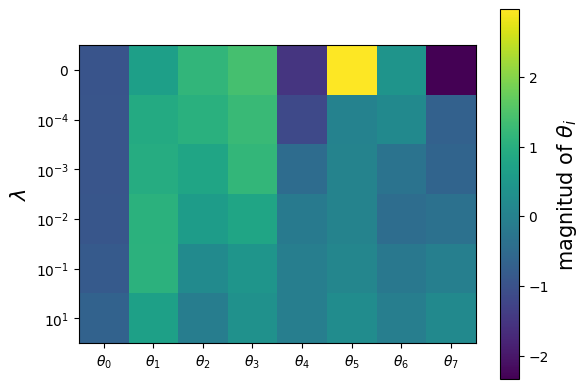

In [64]:
plt.figure(0)
cbar = plt.imshow(w_)
cbar = plt.colorbar(cbar)
cbar.set_label(r'magnitud of $\theta_i$',fontsize=15)
plt.ylabel(r'$\lambda$',fontsize=15)
lambda_ticks = [r'$0$', r'$10^{-4}$', r'$10^{-3}$',
                r'$10^{-2}$', r'$10^{-1}$', r'$10^{1}$']
plt.yticks(np.arange(len(l_)),lambda_ticks)
theta_ticks = [r'$\theta_{%s}$'%i for i in range(len(w_[0]))]
plt.xticks(np.arange(len(w_[0])), theta_ticks,fontsize=10)

#Set up the DataFrame
df = pd.DataFrame(w_, index=l_, columns=[f'θ{i}' for i in range(deg + 1)])

# Display the DataFrame
df_styled = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt')]}]
).set_caption("Coefficients of Polynomial Model for Different λ Values").format("{:.2e}")

df_styled



> As $\boldsymbol{\lambda}$ increases, the magnitudes of the coefficients ($\boldsymbol{\theta}$) typically decrease, which can be observed from the color changes in the heatmap. This effect is part of regularization's role in preventing overfitting by penalizing larger coefficients.

Text(0, 0.5, '$f(x)$')

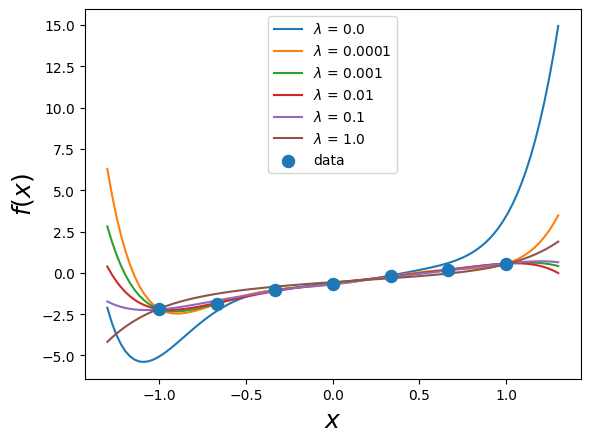

In [15]:
deg = 7
for w,l in zip(w_,l_):
    x_grid = np.linspace(-1.3,1.3,100)
    y_pred = f_poly(x_grid,w,deg)
    plt.plot(x_grid,y_pred,label=r'$\lambda$ = %s'%l)
plt.scatter(x,y,s=75,label='data',zorder=2.5)
plt.legend()
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$f(x)$',fontsize=18)
# plt.savefig('Figures/polyfit_regularization.png',dpi=1800)

### **Homework - Coefficient of determination $R^2$**

The coefficient of determination, commonly denoted as $R^2$, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. In simpler terms, it indicates how well data points fit a statistical model – in this case, a linear model.

1. **Formula for $R^2$**:
   - $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$
   - This formula calculates $R^2$ as the proportion of the total variance in the dependent variable $(y)$ that is predictable from the independent variable $(x)$.

2. **Residual Sum of Squares $SS_{res}$**:
   - $SS_{res} = \sum_{i} (y_i - f(x_i))^2$
   - This is the sum of the squares of the residuals - the differences between the actual values $y_i$ and the values predicted by the model $f(x_i)$.
   - It measures the total deviation of the response values from the fit to the observed data points.

3. **Total Sum of Squares $SS_{tot}$**:
   - $SS_{tot} = \sum_{i} (y_i - \hat{y})^2$
   - Here, $\hat{y}$ is the mean of the observed data: $\hat{y} = \frac{1}{N}\sum_i^{N} y_i $
   - $SS_{tot}$ measures the total variance in the response variable that needs to be explained by the model and by the residuals.





In [ ]:
# Code here
def f_r_square(data,l,deg):

    # solve for theta

    # compute ss_res

    # compute ss_tot

    r2 = #
    return r2